<center><h3> BANKING: DIRECT MARKETING CASE STUDY (CAMPAIGN RESPONSE MODEL) - CLASSIFICATION MODEL </center>

##### Bank client data:
- age (numeric)
- job: type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- marital: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

##### Related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular', 'telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

##### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##### social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)     
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)


##### Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.


##### Data source:
#### https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
####                https://www2.1010data.com/documentationcenter/prod/Tutorials/MachineLearningExamples/BankMarketingDataSet.html



In [58]:
import pandas as pd
from pandas import Series,DataFrame
import pandas_profiling
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rc("font", size=12)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [59]:
%cd D:\ANALYTIXLAB\PYTHON PRACTICE\Bank+Marketing+case+study\bank-additional\bank-additional

D:\ANALYTIXLAB\PYTHON PRACTICE\Bank+Marketing+case+study\bank-additional\bank-additional


In [60]:
## Load the data
databank=pd.read_csv("bank-additional-full.csv", sep=";")

In [61]:
databank['new']=(databank.y=='no')*1

In [62]:
databank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,new
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1


In [63]:
databank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
new               41188 non-null int32
dtypes: floa

In [64]:
databank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
new               0
dtype: int64

In [65]:
databank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [66]:
pandas_profiling.ProfileReport(databank)

Number of variables,22
Number of observations,41188
Total Missing (%),0.0%
Total size in memory,6.8 MiB
Average record size in memory,172.0 B
Numeric,8
Categorical,11
Boolean,1
Date,0
Text (Unique),0
Rejected,2


In [67]:
databank=databank.dropna()

In [68]:
databank.shape

(41188, 22)

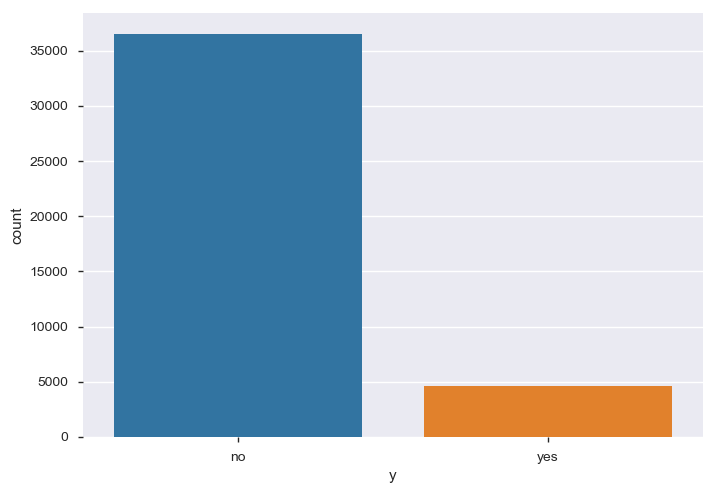

In [69]:
#dependent variable distribution (response vs. non response)
sns.countplot(x='y', data=databank)
#fig,axes = plt.subplots(figsize=(10,4))
plt.show()

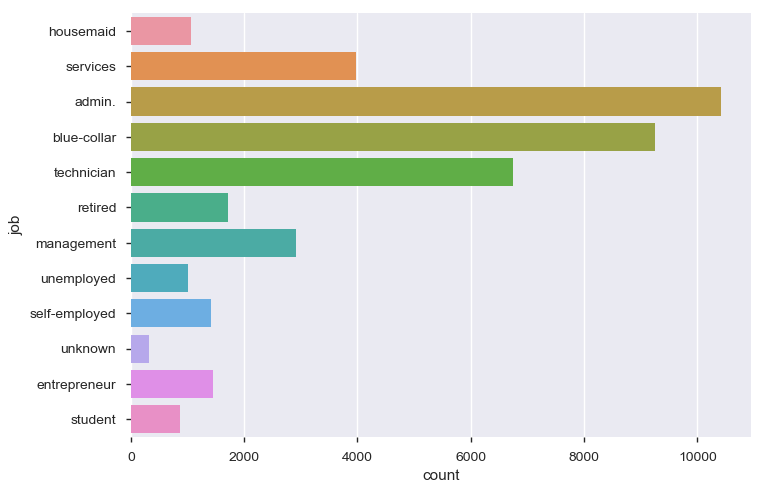

In [70]:
#Customer Job Distribution

sns.countplot(y="job", data=databank)
plt.show()

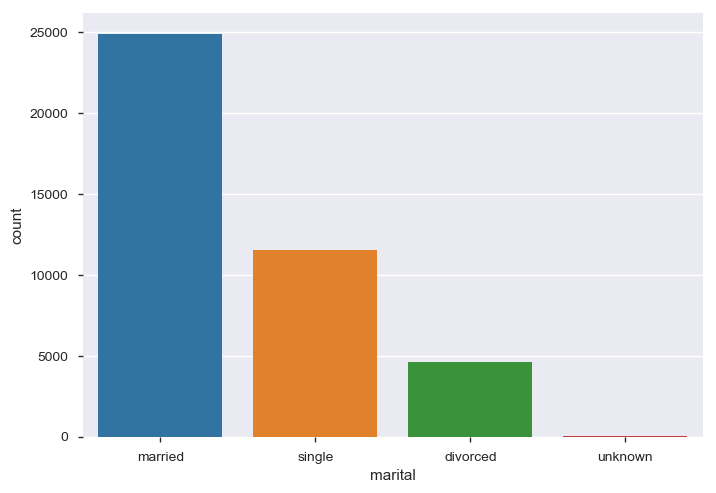

In [71]:
#Customer marital status distribution
sns.countplot(x="marital", data=databank)
plt.show()

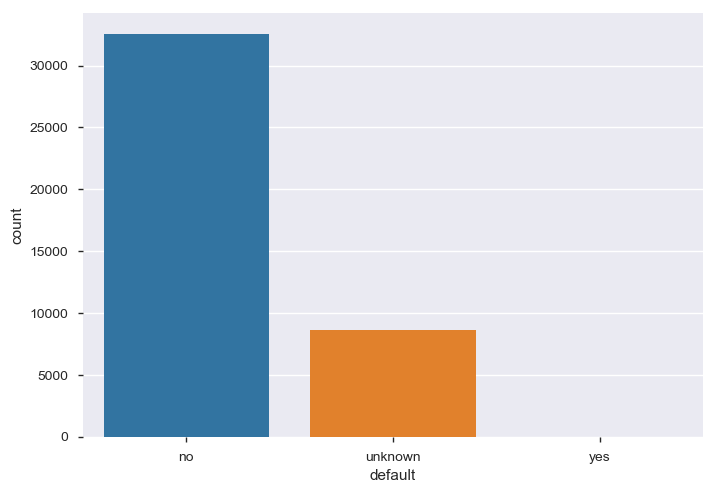

In [72]:
# Distribution of Default
sns.countplot(x="default", data=databank)
plt.show()

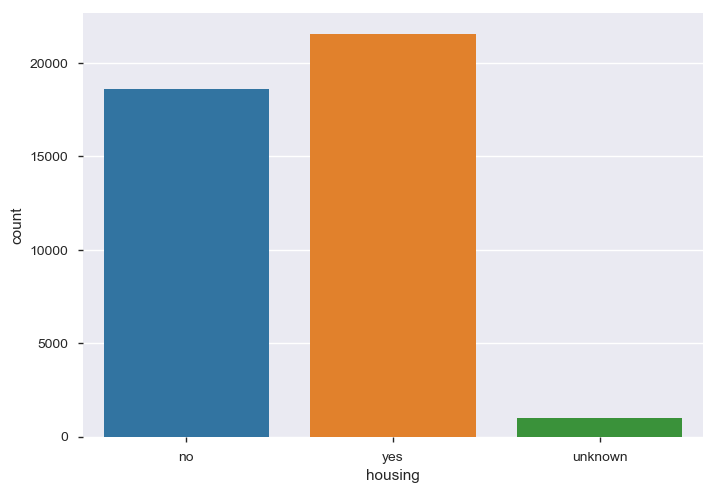

In [73]:
#house loan Distribution
sns.countplot(x="housing", data=databank)
plt.show()

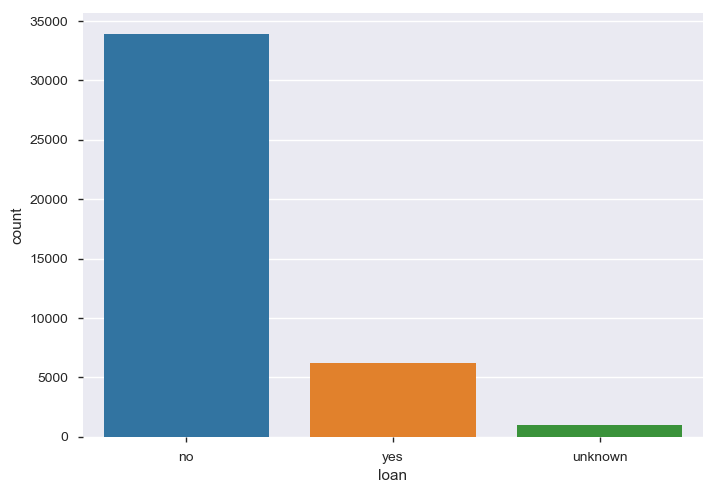

In [74]:
#personal Loan
sns.countplot(x="loan", data=databank)
plt.show()

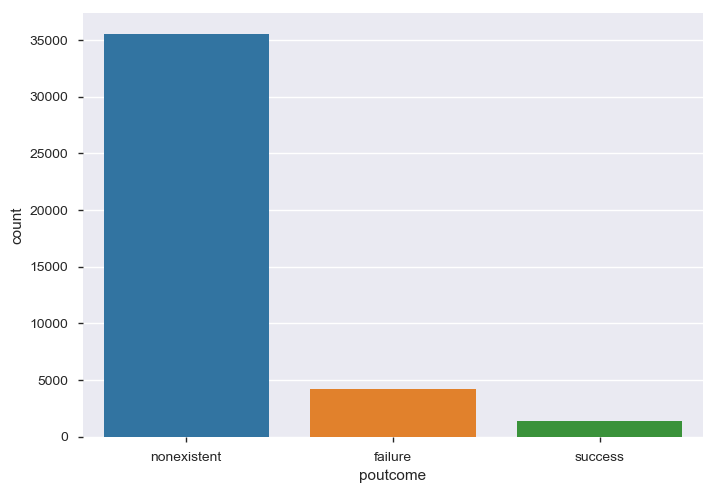

In [75]:
# Previous Marketing campaign response
sns.countplot(x="poutcome", data=databank)
plt.show()

In [76]:
databank.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,new
y,,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600,1
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991,0


##### Observations:
- The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
- The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
- Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

In [77]:
databank.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,new
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.870274
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.931057
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.914835
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.900000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.887825
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.747674
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.895144
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.918619
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.685714


In [78]:
databank.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,new
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.896791
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.898427
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.859959
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313037,5157.393750,0.850000


In [79]:
databank.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,new
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.897510
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.917976
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.921754
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.891645
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.886515
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.862755
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.854997


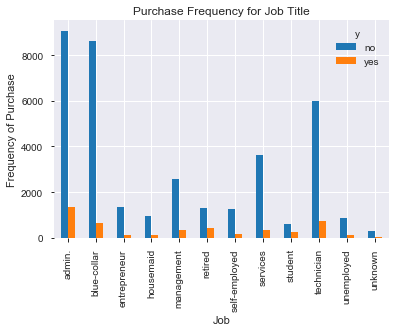

In [80]:
%matplotlib inline
pd.crosstab(databank.job,databank.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

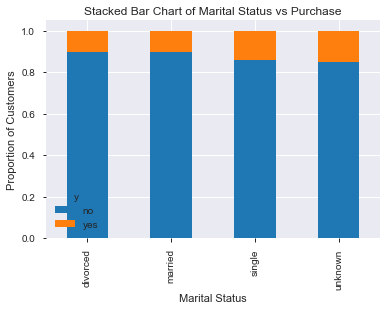

In [81]:
table=pd.crosstab(databank.marital,databank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

The marital status does not seem a strong predictor for the outcome variable.

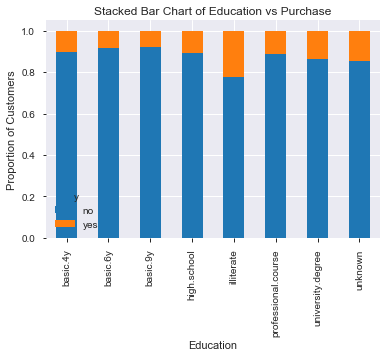

In [82]:
table=pd.crosstab(databank.education,databank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.

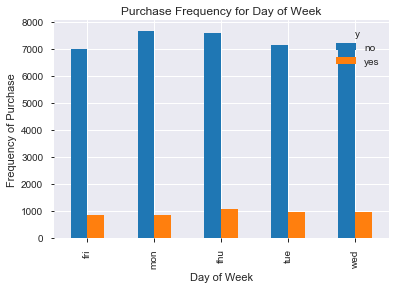

In [83]:
pd.crosstab(databank.day_of_week,databank.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

Day of week may not be a good predictor of the outcome.

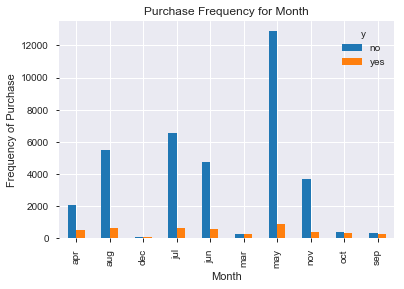

In [84]:
pd.crosstab(databank.month,databank.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

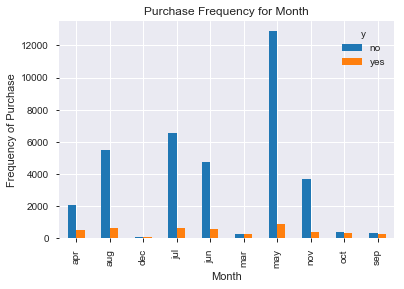

In [85]:
pd.crosstab(databank.month,databank.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable.

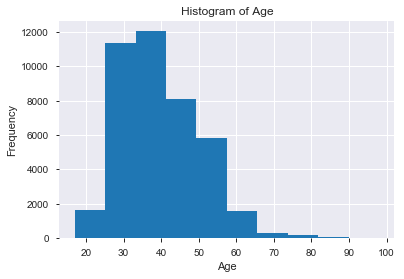

In [86]:
databank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

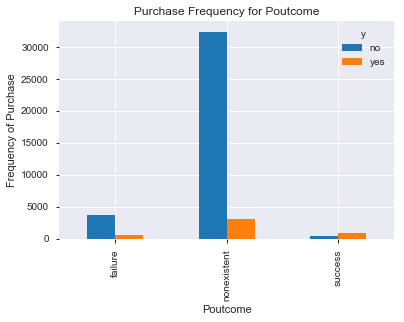

In [87]:
pd.crosstab(databank.poutcome,databank.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.

In [88]:
databank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 22 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
new               41188 non-null int32
dtypes: floa

In [89]:
#Create dummy variables: That is variables with only two values, zero and one.

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(databank[var], prefix=var)
    data1=databank.join(cat_list)
    databank=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=databank.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [90]:
to_keep

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'new',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_wee

In [91]:
cat_vars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [92]:
data_final=databank[to_keep]
data_final.columns

Index([u'age', u'duration', u'campaign', u'pdays', u'previous',
       u'emp.var.rate', u'cons.price.idx', u'cons.conf.idx', u'euribor3m',
       u'nr.employed', u'y', u'new', u'job_admin.', u'job_blue-collar',
       u'job_entrepreneur', u'job_housemaid', u'job_management',
       u'job_retired', u'job_self-employed', u'job_services', u'job_student',
       u'job_technician', u'job_unemployed', u'job_unknown',
       u'marital_divorced', u'marital_married', u'marital_single',
       u'marital_unknown', u'education_basic.4y', u'education_basic.6y',
       u'education_basic.9y', u'education_high.school',
       u'education_illiterate', u'education_professional.course',
       u'education_university.degree', u'education_unknown', u'default_no',
       u'default_unknown', u'default_yes', u'housing_no', u'housing_unknown',
       u'housing_yes', u'loan_no', u'loan_unknown', u'loan_yes',
       u'contact_cellular', u'contact_telephone', u'month_apr', u'month_aug',
       u'month_dec', u'mon

In [93]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

In [94]:
data_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


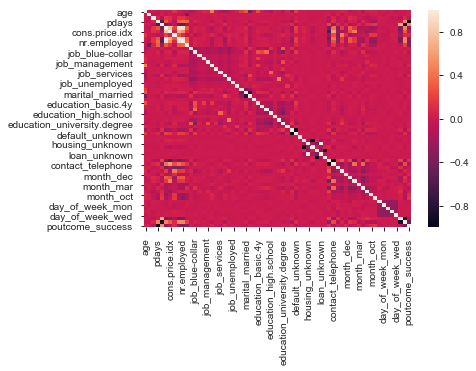

In [95]:
#Check the independence between the independent variables
sns.heatmap(data_final.corr())
plt.show()

##### Feature Selection
from sklearnRecursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [98]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
rfe=RFE(logreg,25)
rfe=rfe.fit(data_final[X],data_final[y])
print(rfe.support_)
print(rfe.ranking_)



C:\Users\Satya\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False  True  True  True False  True False  True False
  True False False False  True False  True  True False False False False
 False False False False  True False False False False  True  True  True
  True False False False False False False False False False  True False
 False  True False  True  True  True  True False False  True False False
  True  True  True  True]
[37 32 35 36  1  1  1 13  1 24  1 20  1 21  5  9  1  4  1  1 16 30 31 33
 34  2 25 27  1 15 17 29 26  1  1  1  1 40  8 11 22 10 14 28  6  3  1 12
 39  1  7  1  1  1  1 23 38  1 18 19  1  1  1  1]


In [99]:
dic={'Columns' : list(data_final[X].columns),'use' : list(rfe.support_)}
use=pd.DataFrame(dic)
use_final=use[use.use==True]
use_final

,Columns,use
4,previous,True
5,emp.var.rate,True
6,cons.price.idx,True
8,euribor3m,True
10,new,True
12,job_blue-collar,True
16,job_retired,True
18,job_services,True
19,job_student,True
28,education_basic.6y,True



The RFE has helped us select the following features: “previous”, “euribor3m”, “job_blue-collar”, “job_retired”, “job_services”, “job_student”, “default_no”, “month_aug”, “month_dec”, “month_jul”, “month_nov”, “month_oct”, “month_sep”, “day_of_week_fri”, “day_of_week_wed”, “poutcome_failure”, “poutcome_nonexistent”, “poutcome_success”.

In [100]:
cols=['previous','emp.var.rate','cons.price.idx','euribor3m','new','job_blue-collar','job_retired','job_student','job_services',
      'default_unknown','month_apr','month_jul','month_mar','month_may','month_nov','month_oct','day_of_week_mon',
      'poutcome_failure','poutcome_success','education_basic.6y','education_university.degree','education_unknown',
     'default_no','day_of_week_wed','poutcome_nonexistent']
X=data_final[cols]
y=data_final['y']

### IMPLEMENTING THE MODEL

In [101]:
X

,previous,emp.var.rate,cons.price.idx,euribor3m,new,job_blue-collar,job_retired,job_student,job_services,default_unknown,...,month_oct,day_of_week_mon,poutcome_failure,poutcome_success,education_basic.6y,education_university.degree,education_unknown,default_no,day_of_week_wed,poutcome_nonexistent
0,0,1.1,93.994,4.857,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,0,1.1,93.994,4.857,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
2,0,1.1,93.994,4.857,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
3,0,1.1,93.994,4.857,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
4,0,1.1,93.994,4.857,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
5,0,1.1,93.994,4.857,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
6,0,1.1,93.994,4.857,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
7,0,1.1,93.994,4.857,1,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
8,0,1.1,93.994,4.857,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
9,0,1.1,93.994,4.857,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1


In [102]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=12)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg=LogisticRegression()
logreg.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [103]:
y_pred=logreg.predict(test_X)
print('Accuracy of Logistic Regression CLasssifier on test set:{:.2f}'.format(logreg.score(test_X,test_y)))

Accuracy of Logistic Regression CLasssifier on test set:1.00



##### Cross Validation
Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Logistic Regression model.

In [104]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold=model_selection.KFold(n_splits=10,random_state=1)
modelCV=LogisticRegression()
scoring='accuracy'
results=model_selection.cross_val_score(modelCV,train_X,train_y,cv=kfold,scoring=scoring)
print("10-fold cross validation average accuracy: %0.3f" % (results.mean()))

10-fold cross validation average accuracy: 1.000


The average accuracy remains very close to the Logistic Regression model accuracy; hence, we can conclude that our model generalizes well.

In [105]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, y_pred)
print(confusion_matrix)

[[10910     0]
 [    0  1447]]


In [106]:
test_y

28800     no
31345     no
20075     no
2929      no
4776      no
30680     no
39065    yes
1020      no
29343     no
39247     no
17811     no
10991     no
31014     no
39988     no
16245     no
17352     no
24442     no
2767      no
25642     no
15588     no
12117     no
26203     no
4099      no
2128      no
10296     no
7392      no
38659     no
17767     no
5214      no
17275     no
        ... 
1075      no
3385      no
36925     no
22044     no
37923     no
26595    yes
33669     no
1526      no
36060     no
24001    yes
27252     no
25815     no
25552     no
32547     no
23176     no
18240     no
38071    yes
38357     no
12321     no
16969     no
13036     no
19309     no
6195      no
24813     no
28272    yes
22147     no
9807      no
5225      no
6948      no
23202     no
Name: y, Length: 12357, dtype: object

In [107]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     10910
         yes       1.00      1.00      1.00      1447

   micro avg       1.00      1.00      1.00     12357
   macro avg       1.00      1.00      1.00     12357
weighted avg       1.00      1.00      1.00     12357



In [108]:
logreg.predict_proba(test_X)[:,1]

array([0.00090594, 0.00060462, 0.00035414, ..., 0.00030405, 0.00026336,
       0.00039221])

## Naive Bayes

In [116]:
import sklearn.naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sn
from sklearn.model_selection import GridSearchCV

In [118]:
nb_clf=GaussianNB()
nb_clf.fit(train_X,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [119]:
nb_clf.predict(test_X)

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype='|S3')

Text(0.5,12.5,'predicted label')

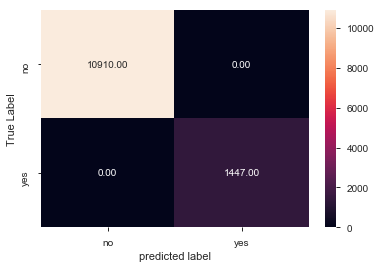

In [120]:
nb_cm=metrics.confusion_matrix(test_y,nb_clf.predict(test_X))
sn.heatmap(nb_cm,annot=True, fmt='.2f', xticklabels=["no", "yes"], yticklabels= ["no", "yes"])
plt.ylabel('True Label')
plt.xlabel('predicted label')

In [121]:
metrics.accuracy_score( test_y, nb_clf.predict( test_X ) )

1.0

## KNN

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sn
from sklearn.model_selection import GridSearchCV

In [123]:
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11]}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')

In [124]:
knn_clf.fit(train_X, train_y )

knn_clf.best_score_

0.9908778745100759

In [125]:
knn_clf.best_params_

{'n_neighbors': 3}

In [126]:
#Building for the n_neighbors=3
knn_clf = KNeighborsClassifier( n_neighbors =3 )

In [127]:
knn_clf.fit( train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [128]:
knn_cm = metrics.confusion_matrix( test_y, knn_clf.predict( test_X ) )

Text(0.5,12.5,'Predicted label')

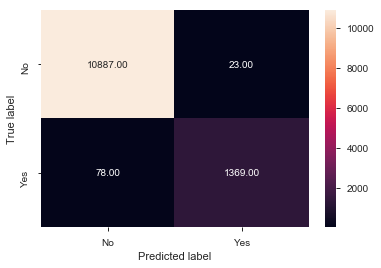

In [129]:
sn.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [130]:
metrics.accuracy_score( test_y, knn_clf.predict( test_X ) )

0.9918264951039897